In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from pyrsgis import raster
from pyrsgis import ml
import random
from copy import copy
from itertools import cycle
from osgeo import gdal

In [2]:
S2 = rio.open("E:/Sentinel2/Sistan_Sentinel.tif")
S2_array = S2.read()

In [3]:
S2_array

array([[[2112, 2070, 2056, ..., 2527, 2510, 2522],
        [2117, 2102, 2065, ..., 2532, 2585, 2622],
        [2125, 2125, 2116, ..., 2545, 2543, 2592],
        ...,
        [1397, 1411, 1417, ..., 2112, 2095, 2083],
        [1454, 1442, 1470, ..., 2085, 2096, 2086],
        [1574, 1491, 1475, ..., 2088, 2097, 2104]],

       [[2308, 2288, 2270, ..., 2888, 2868, 2850],
        [2345, 2294, 2290, ..., 2887, 2938, 2968],
        [2352, 2349, 2333, ..., 2915, 2913, 2962],
        ...,
        [1381, 1387, 1412, ..., 2364, 2349, 2335],
        [1437, 1456, 1471, ..., 2357, 2343, 2342],
        [1582, 1499, 1500, ..., 2351, 2356, 2338]],

       [[2745, 2711, 2721, ..., 3568, 3536, 3547],
        [2752, 2719, 2746, ..., 3549, 3563, 3636],
        [2796, 2756, 2762, ..., 3549, 3587, 3665],
        ...,
        [1482, 1521, 1555, ..., 2882, 2837, 2836],
        [1582, 1607, 1599, ..., 2869, 2869, 2847],
        [1805, 1649, 1637, ..., 2858, 2853, 2830]],

       ...,

       [[3002, 3002, 297

In [4]:
GT = rio.open("E:/Sentinel2/Sistan_Sentinel_Training.tif")
GT_array = GT.read()

In [5]:
GT_array

array([[[  0,   0,   0, ...,   0,   0, 255],
        [  0,   0,   0, ...,   0,   0, 255],
        [  0,   0,   0, ...,   0,   0, 255],
        ...,
        [  0,   0,   0, ...,   0,   0, 255],
        [  0,   0,   0, ...,   0,   0, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

IMAGE

In [6]:
S2_array.shape

(10, 866, 770)

In [7]:
GT_array.shape

(1, 866, 770)

In [8]:
nrows = S2_array.shape[1]
ncolumns = S2_array.shape[2]
nbands = S2_array.shape[0]

In [9]:
print(nrows)

866


In [10]:
print (ncolumns)

770


In [11]:
print (nbands)

10


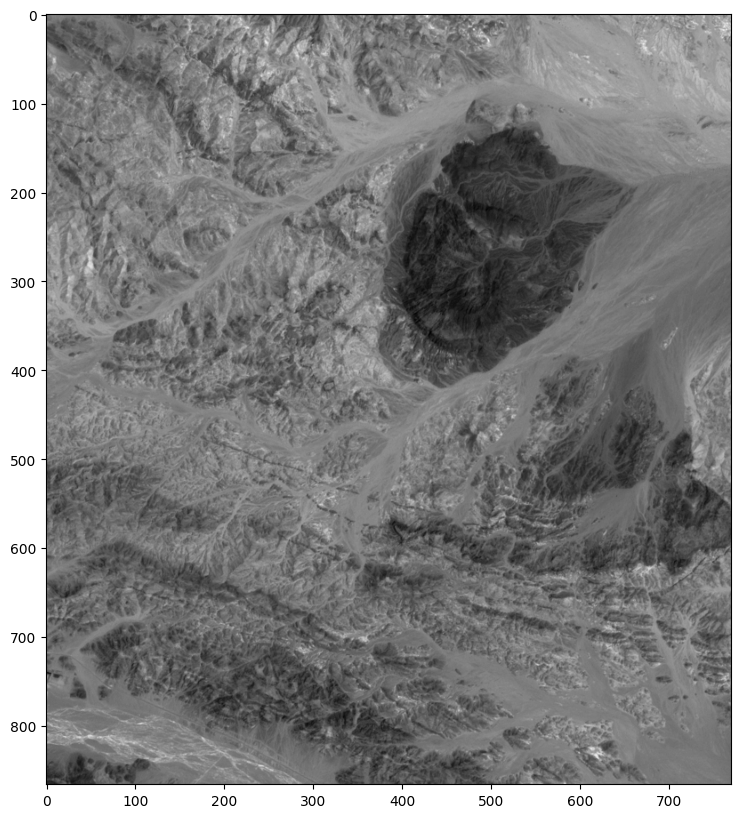

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[0,:,:], cmap = 'gray')

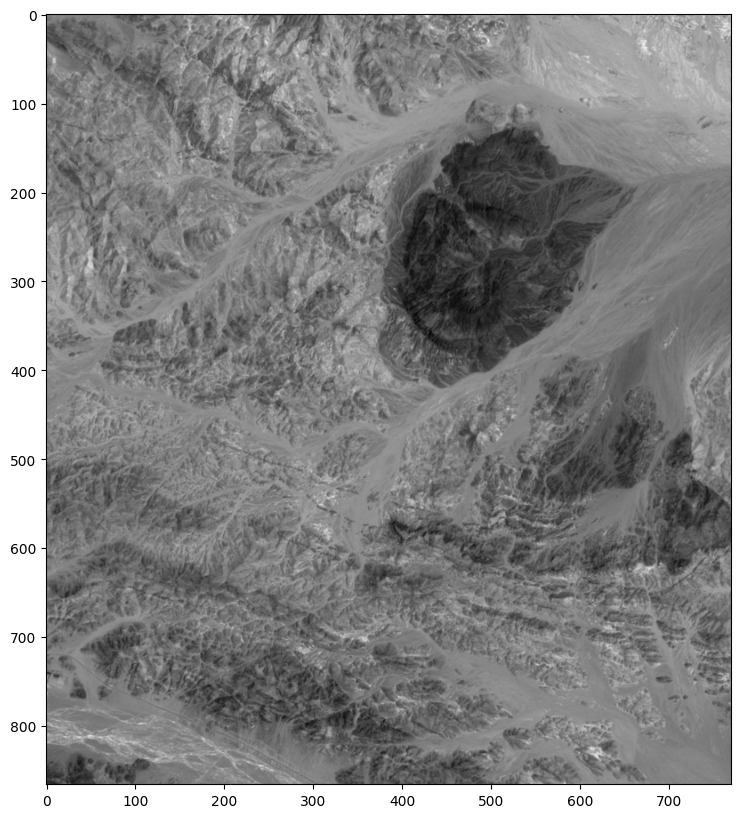

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[1,:,:], cmap = 'gray')

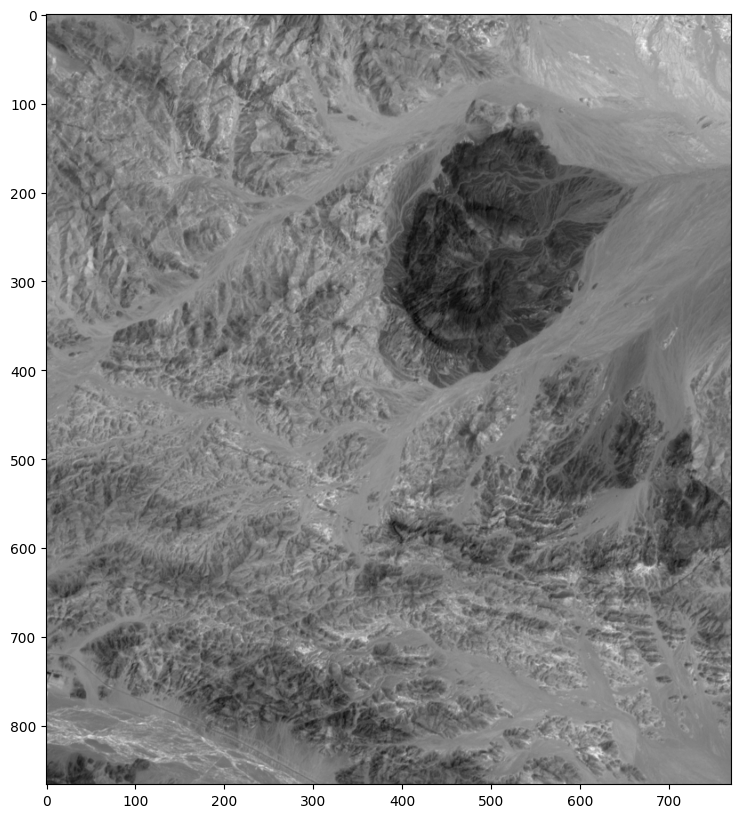

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[2,:,:], cmap = 'gray')

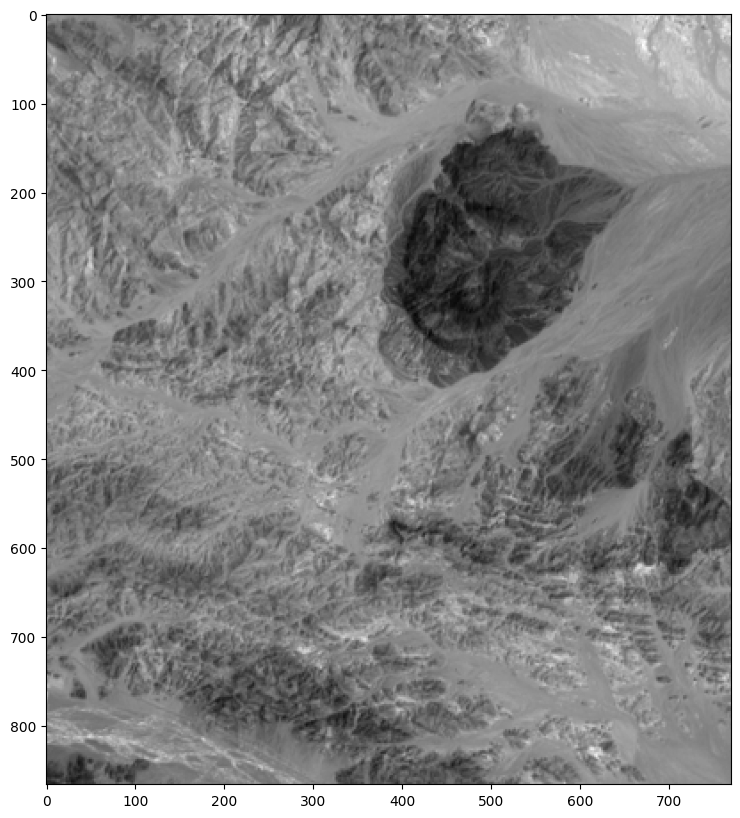

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[3,:,:], cmap = 'gray')

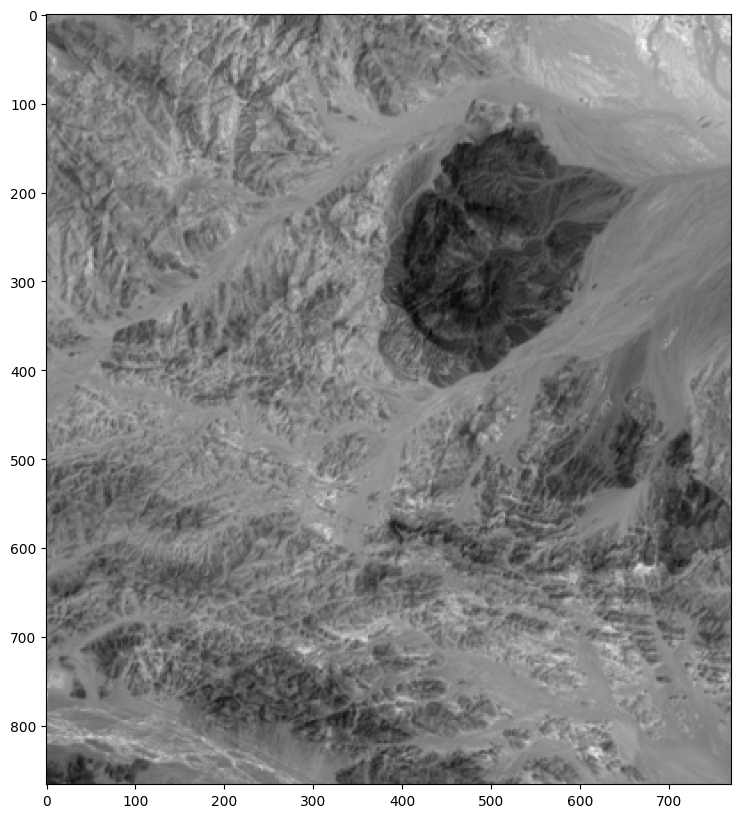

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[4,:,:], cmap = 'gray')

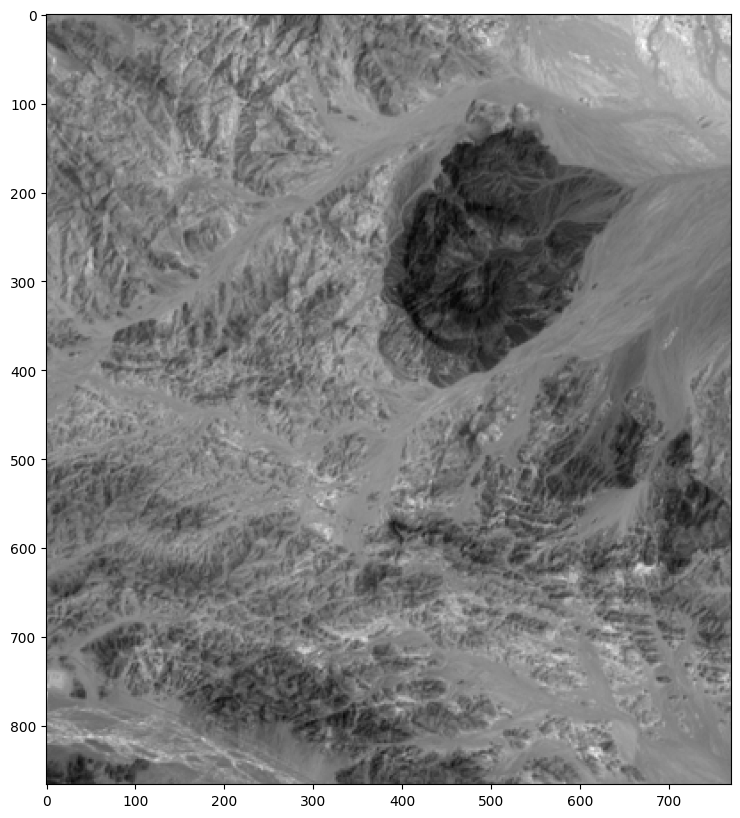

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[5,:,:], cmap = 'gray')

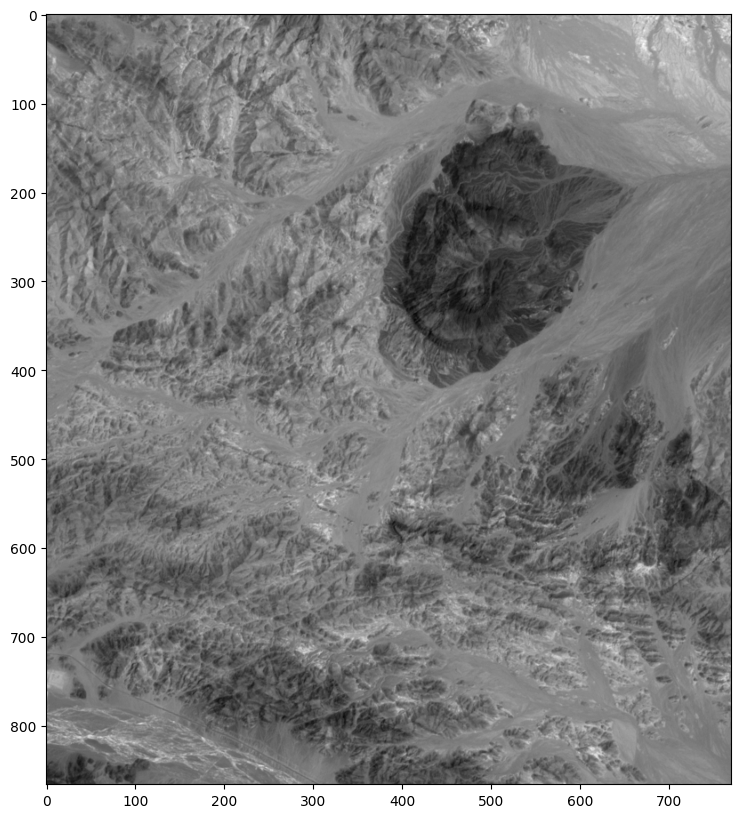

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[6,:,:], cmap = 'gray')

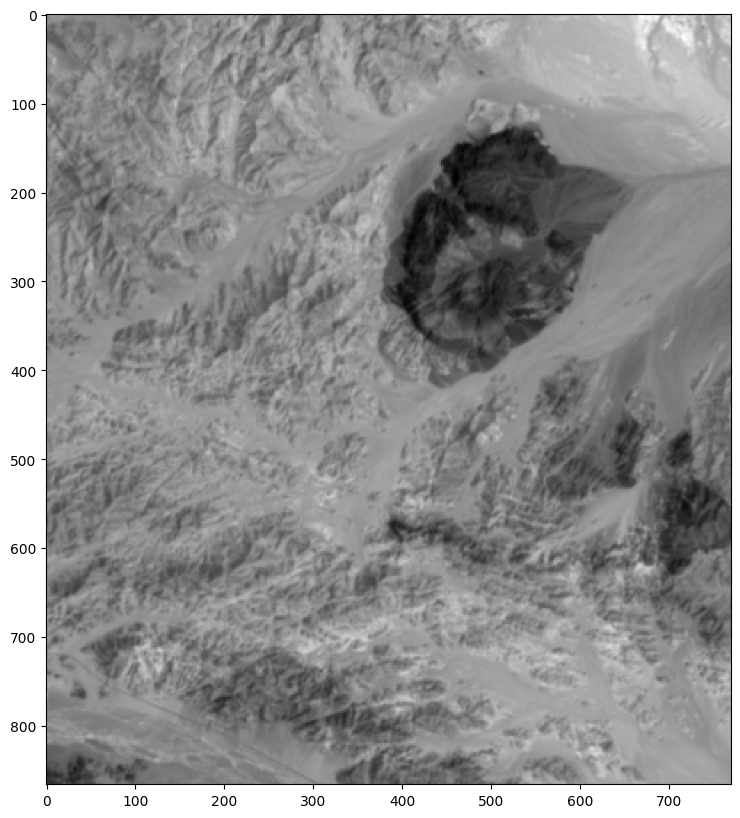

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[8,:,:], cmap = 'gray')

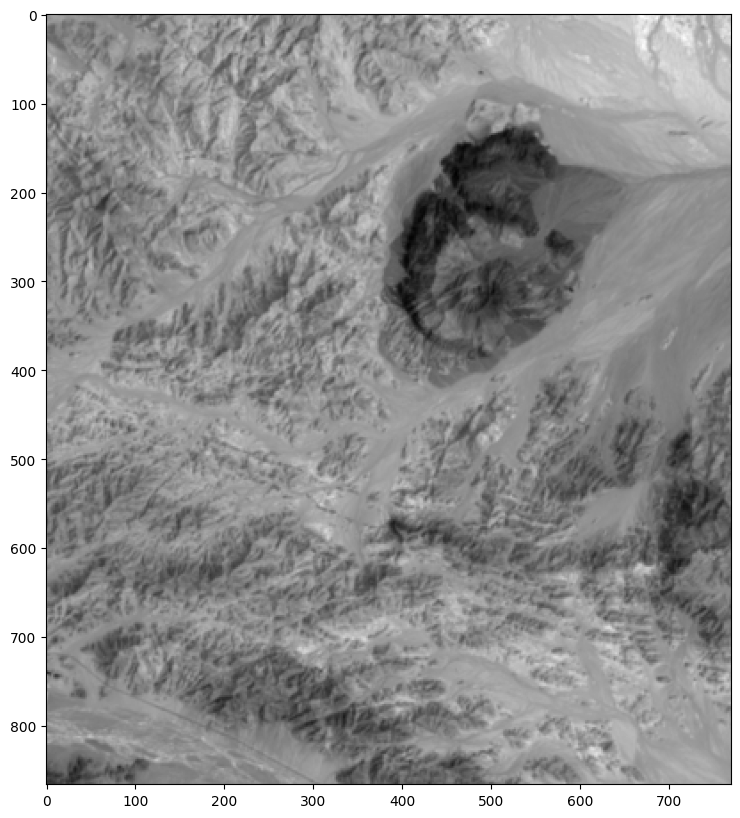

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[9,:,:], cmap = 'gray')

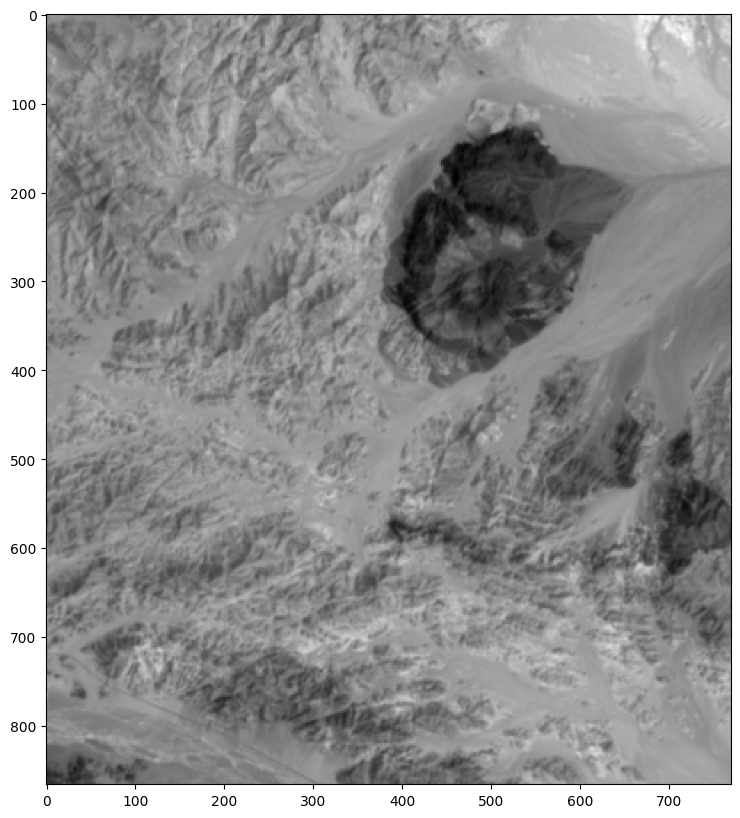

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(S2_array[8,:,:], cmap = 'gray')

<function matplotlib.pyplot.show(close=None, block=None)>

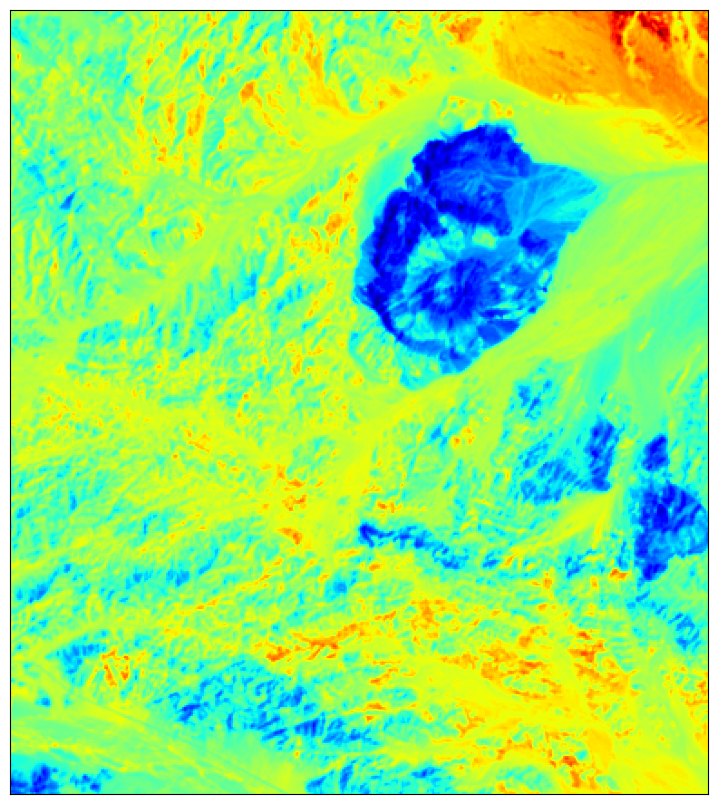

In [22]:
plt.figure(figsize=(9,19))
plt.imshow(S2_array[8,:,:], cmap = 'jet')
plt.xticks([])
plt.yticks([])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

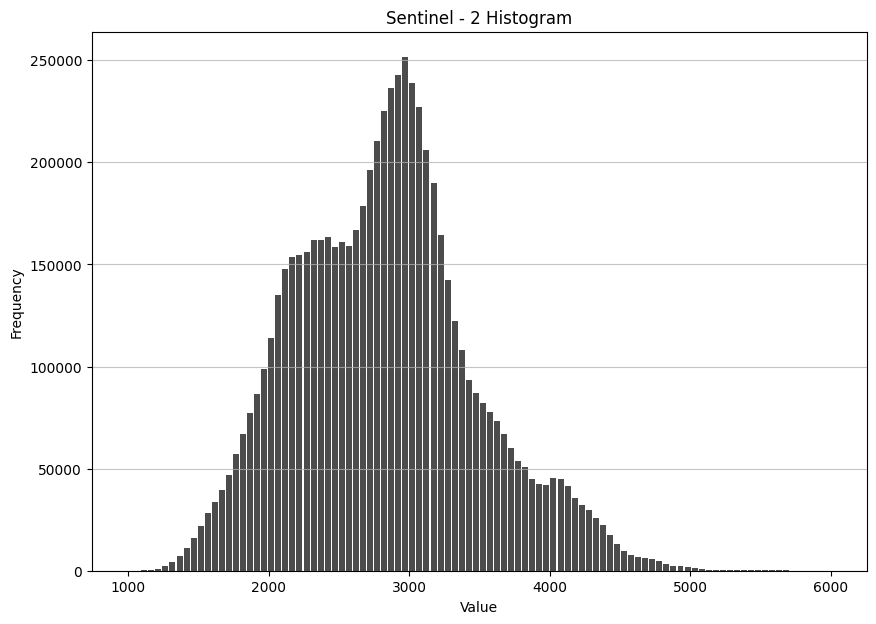

In [23]:
plt.figure(figsize=(10,7))
plt.grid(axis='y', alpha= 0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sentinel - 2 Histogram')
n , bins , patches = plt.hist(x = S2_array.flatten(), bins = 100 , color = 'black' , alpha= 0.7 , rwidth= 0.85)
plt.show

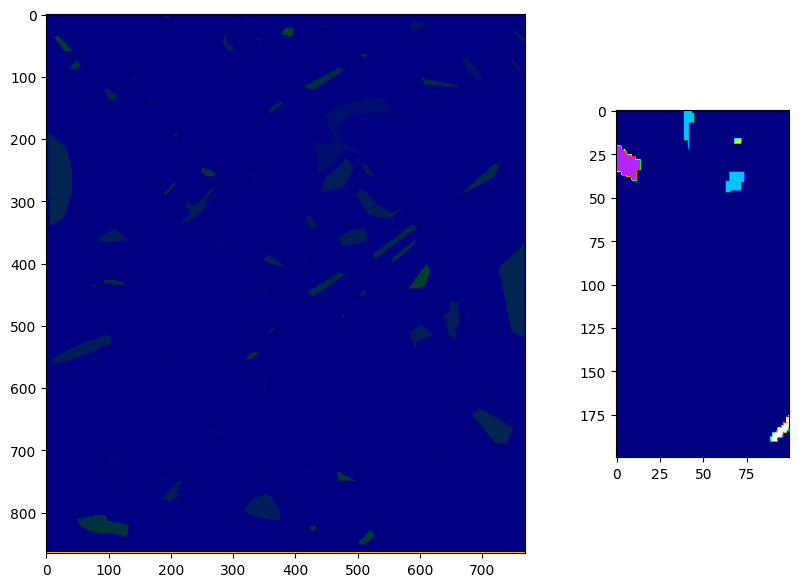

In [24]:
fig = plt.figure(figsize=(13,7))
gs = fig.add_gridspec(1,5)
fig.add_subplot(gs[0,:3]), plt.imshow(GT_array[0,:,:], cmap = "gist_ncar")
fig.add_subplot(gs[0,-2]), plt.imshow(GT_array[0,100:300,100:200], cmap = "gist_ncar")
plt.show()

In [25]:
list(np.unique (GT_array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 255]

In [26]:
GT_array[GT_array == 255] = 0

In [27]:
classes = np.unique(GT_array)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [51]:
c = 0
cls = np.zeros((nrows, ncolumns), dtype = int)
cls[GT_array[0,:,:] ==c ] = 1

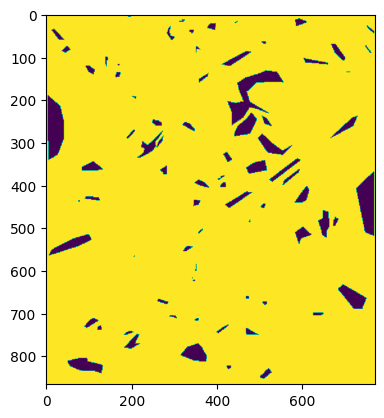

In [52]:
plt.figure()
plt.imshow(cls)
plt.show()

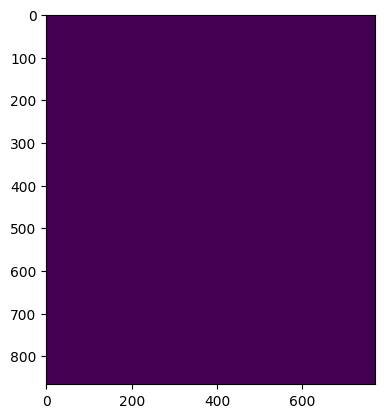

In [53]:
m = np.zeros((nrows, ncolumns), dtype = int)
plt.figure()
plt.imshow(m)
plt.show()

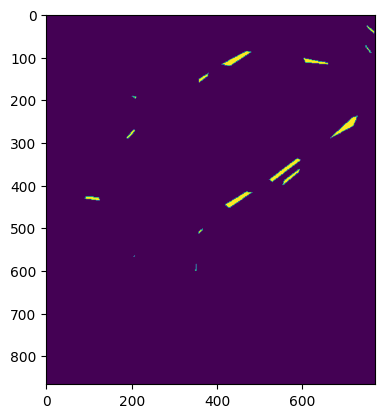

In [54]:
d = 6
cls = np.zeros((nrows, ncolumns), dtype = int)
cls[GT_array[0,:,:] ==d ] = 1
plt.figure()
plt.imshow(cls)
plt.show()

In [55]:
print(classes)

[0 1 2 3 4 5 6 7 8 9]


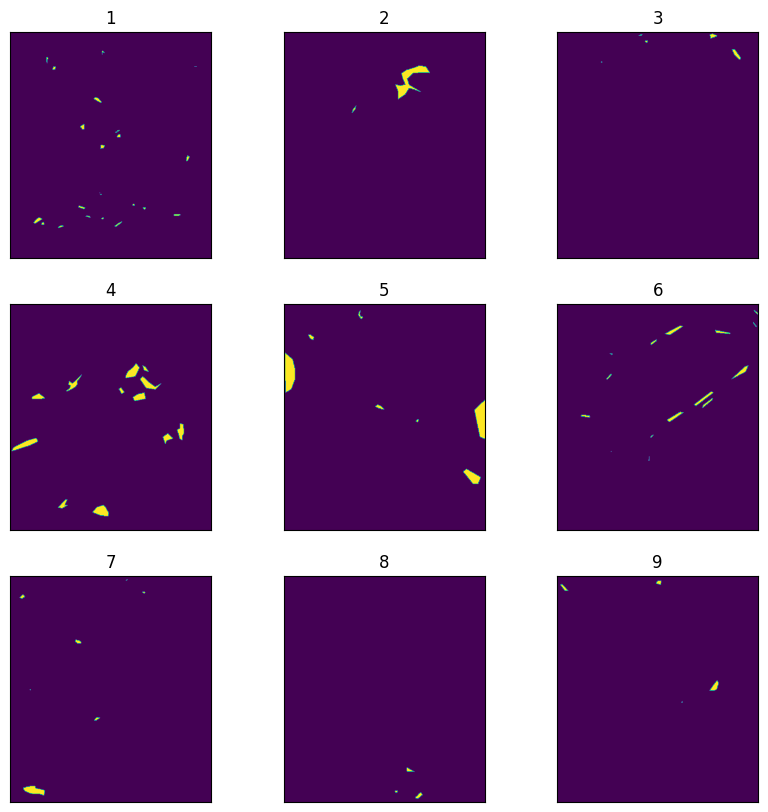

In [61]:
plt.figure(figsize = (10,10))
plt.tight_layout()
for i in range(len(classes)):
  if i < 1 :
    continue
  C = np.zeros((nrows,ncolumns))
  C[GT_array[0,:,:] == classes [i]] = 1
  plt.subplot(3,3,i)
  plt.title(str(classes[i]))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(C)
plt.show()
    

In [62]:
GT_array = GT_array[0,:,:].astype(int)

In [63]:
GT_array.shape

(866, 770)

In [64]:
print(GT_array.shape)
print(GT_array.flatten().shape)
print(nrows*ncolumns)

(866, 770)
(666820,)
666820


In [66]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [65]:
for i in range(20):
    if i in classes:
        print(len(np.where(GT_array.flatten() == i)[0]))

628149
2294
4957
878
11245
11220
4051
2330
583
1113


<function matplotlib.pyplot.show(close=None, block=None)>

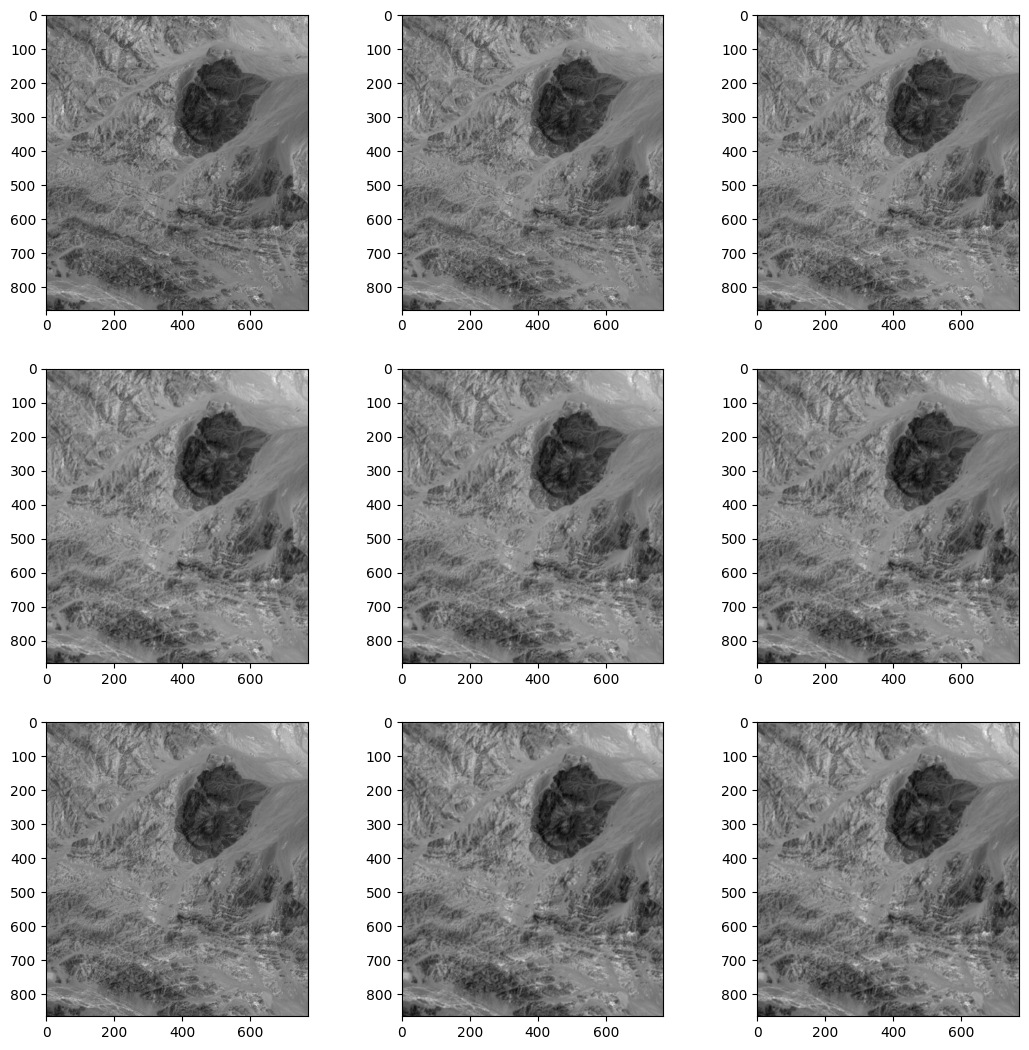

In [69]:
plt.figure(figsize = (13,13))
plt.subplot (331), plt.imshow(S2_array[0,:,:], cmap = 'gray')
plt.subplot (332), plt.imshow(S2_array[1,:,:], cmap = 'gray')
plt.subplot (333), plt.imshow(S2_array[2,:,:], cmap = 'gray')
plt.subplot (334), plt.imshow(S2_array[3,:,:], cmap = 'gray')
plt.subplot (335), plt.imshow(S2_array[4,:,:], cmap = 'gray')
plt.subplot (336), plt.imshow(S2_array[5,:,:], cmap = 'gray')
plt.subplot (337), plt.imshow(S2_array[6,:,:], cmap = 'gray')
plt.subplot (338), plt.imshow(S2_array[7,:,:], cmap = 'gray')
plt.subplot (339), plt.imshow(S2_array[7,:,:], cmap = 'gray')
plt.show

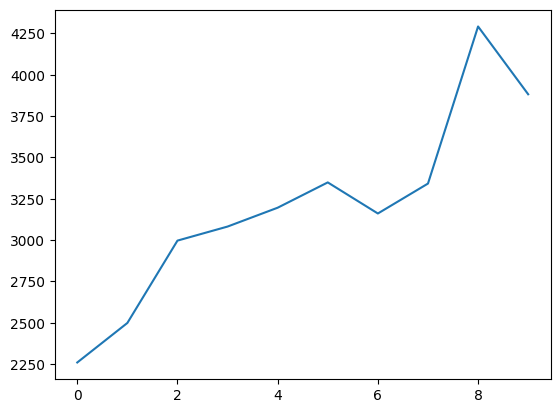

In [71]:
plt.plot(S2_array[:,200,300])